In [2]:
#@formatter:off
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import datasets
import warnings

%matplotlib inline
# sns.set_theme(style='whitegrid')
plt.style.use('default')
#@formatter:on

# Linear regression

[[1.33998685]
 [0.76574757]
 [1.24659148]
 [1.56679727]
 [1.79758855]
 [1.20964078]
 [1.03324758]
 [0.43308734]
 [1.99133211]
 [1.15807959]]
[[1.         1.33998685]
 [1.         0.76574757]
 [1.         1.24659148]
 [1.         1.56679727]
 [1.         1.79758855]
 [1.         1.20964078]
 [1.         1.03324758]
 [1.         0.43308734]
 [1.         1.99133211]
 [1.         1.15807959]]
[[7.78946776]
 [9.03884011]
 [8.02901556]
 [8.70580986]
 [7.16846523]
 [7.36379152]
 [9.86556625]
 [5.25870206]
 [9.54810241]
 [8.08880162]]


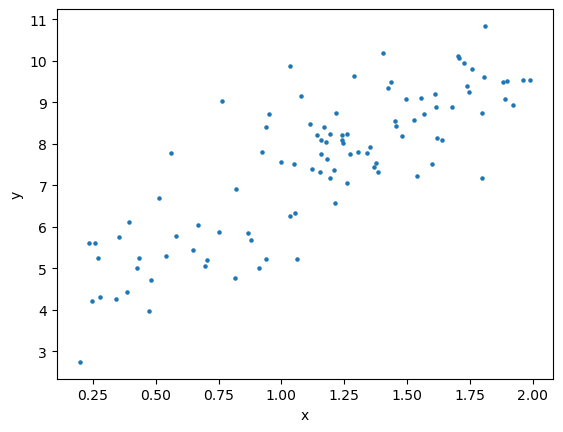

In [3]:
def default_scatterplot(X, y):
    plt.scatter(X, y, s=5)
    plt.xlabel('x')
    plt.ylabel('y')


m = 100
X = 2 * np.random.rand(m, 1)
print(X[:10])
X_b = np.c_[np.ones((m, 1)), X]
print(X_b[:10])
y = 4 + 3 * X + np.random.randn(m, 1)
print(y[:10])
default_scatterplot(X, y)

In [4]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # !!!!!
print(theta_best)

[[4.05783939]
 [2.99484373]]


[[1. 0.]
 [1. 2.]]
[[ 4.05783939]
 [10.04752684]]


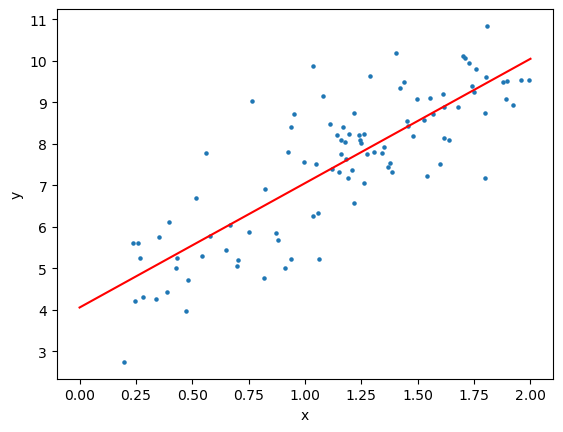

In [5]:
X_ext = np.array([[0], [2]])
X_ext_b = np.c_[np.ones((2, 1)), X_ext]
print(X_ext_b)
y_ext = X_ext_b @ theta_best
print(y_ext)

default_scatterplot(X, y)
plt.plot(X_ext, y_ext, c='r')

In [6]:
y_predict = X_b @ theta_best
rmse = np.sqrt(1 / m * np.sum((y_predict - y) ** 2))
print(rmse)

0.9807372340840281


## Scikit Linear regression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
skl_ext_predict = lin_reg.predict(X_ext)
print(skl_ext_predict)
skl_predict = lin_reg.predict(X)
lin_mse = mean_squared_error(skl_predict, y)
print(np.sqrt(lin_mse))

[4.05783939] [[2.99484373]]
[[ 4.05783939]
 [10.04752684]]
0.9807372340840281


# Gradient descent

### Pocket

In [8]:
eta = 0.1  # learning speed
n_iterations = 1000
theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradient = 2 / m * (X_b.T @ (X_b @ theta - y))  # !!!!!
    theta = theta - eta * gradient
print(theta)

[[4.05783938]
 [2.99484373]]


### Pocket + tolerant

In [9]:
epsilon = np.array([[0.0001], [0.0001]])
gradient = np.array([[1], [1]])
theta = np.random.randn(2, 1)
n_iterations = 0

while np.any(np.abs(gradient) > epsilon):
    gradient = 2 / m * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradient
    n_iterations += 1

print(theta)
print(n_iterations)

[[4.05731731]
 [2.99525491]]
431


### Stochastic + simulated annealing

In [10]:
def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)


n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi, yi = X_b[[random_index]], y[[random_index]]
        gradient = 2 * (xi.T @ (xi @ theta - yi))
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
print(theta)

[[4.01451569]
 [3.05113705]]


### Mini-pocket

In [11]:
eta = 0.1
sample_size = 10
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(int(m / sample_size)):
        random_indices = np.random.randint(m, size=sample_size)
        xs, ys = X_b[random_indices], y[random_indices]
        gradient = 2 / sample_size * (xs.T @ (xs @ theta - ys))
        theta = theta - eta * gradient
print(theta)

[[4.07015533]
 [3.08974412]]


## Scikit Gradient descent

In [12]:
# eta0 is initial learning rate
sgd_reg = SGDRegressor(eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.96734638] [3.08339172]


# Polynomial regression

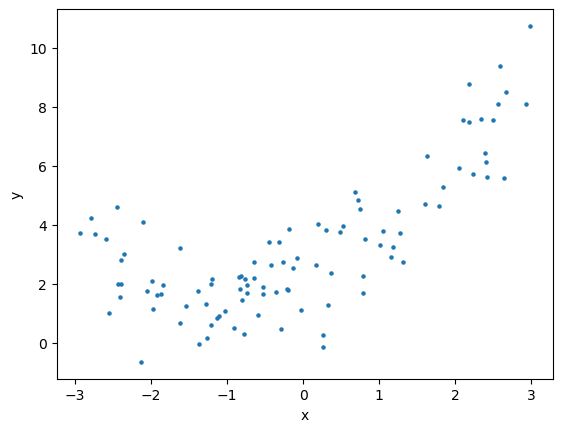

In [13]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
default_scatterplot(X, y)

In [14]:
X_poly = poly_features.fit_transform(X)
print(X[:10])
print(X_poly[:10])

[[-1.02662406]
 [ 0.32180953]
 [ 0.78637436]
 [-1.99302278]
 [-0.21055406]
 [-0.74308982]
 [-2.43837477]
 [-2.54699583]
 [-0.81661679]
 [ 1.00622878]]
[[-1.02662406  1.05395697]
 [ 0.32180953  0.10356137]
 [ 0.78637436  0.61838463]
 [-1.99302278  3.97213981]
 [-0.21055406  0.04433301]
 [-0.74308982  0.55218249]
 [-2.43837477  5.94567153]
 [-2.54699583  6.48718774]
 [-0.81661679  0.66686299]
 [ 1.00622878  1.01249637]]


[2.14159053] [[0.99726086 0.46734837]]


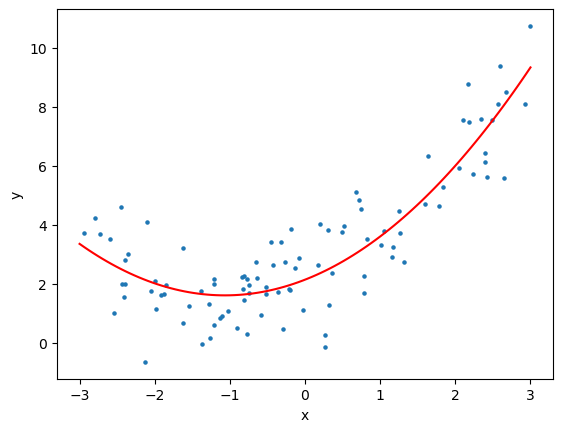

In [15]:
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot_pred = lin_reg.predict(X_plot_poly)

default_scatterplot(X, y)
plt.plot(X_plot, y_plot_pred, c='r')

# Fitting

### Underfitting (RMSE is high)

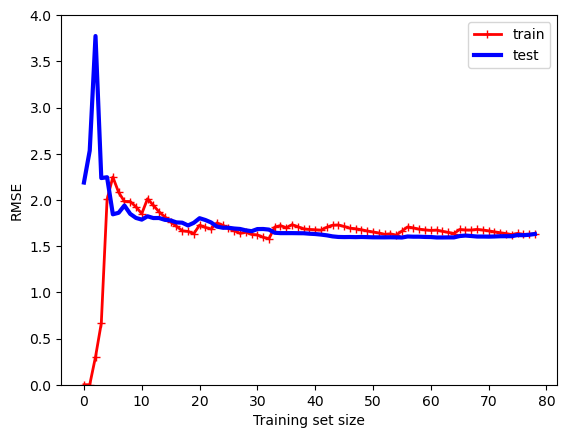

In [16]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", lw=2, label='train')
    plt.plot(np.sqrt(test_errors), "b-", lw=3, label='test')
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([0, 4])


plot_learning_curves(lin_reg, X, y)

### Overfitting (RMSE difference is big)

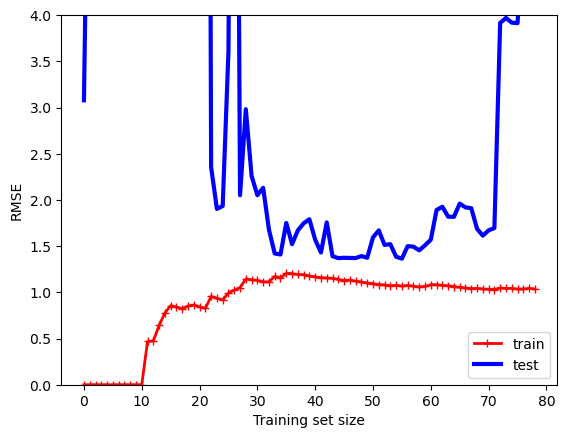

In [17]:
pol_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(pol_reg, X, y)

# Regularization

### Ridge regression
J(theta) = MSE(theta) + a/2 * sum_{i=1}^{n}(theta_i^2)

In [18]:
# alpha is regularization strength
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.90965445]])

In [19]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.87880038])

### Lasso-regression (eliminates useless features)
J(theta) = MSE(theta) + a * sum_{i=1}^{n}|theta_i|

In [20]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)
print(lasso_reg.predict([[1.5]]))
sgd_reg = SGDRegressor(penalty='l1')

[4.28261605]


### Elastic net (hybrid)
J(theta) = MSE(theta) + ra * sum_{i=1}^{n}|theta_i| + (1-r)a/2 * sum_{i=1}^{n}(theta_i^2)

In [21]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.85275786])

### Early stopping

min MSE: 0.8972695695302424


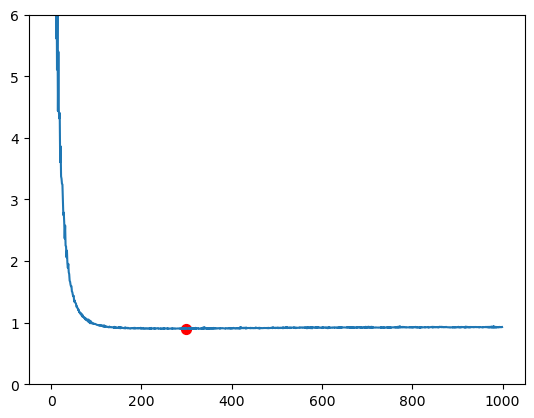

In [22]:
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

min_test_error = float('inf')
best_epoch = None
best_model = None
errors = []

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
# warm_start=True means "continue learning, not restart"

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for epoch in range(1000):
        sgd_reg.fit(X_train_poly_scaled, y_train)
        y_test_predict = sgd_reg.predict(X_test_poly_scaled)
        test_error = mean_squared_error(y_test, y_test_predict)
        errors.append([epoch, test_error])
        if test_error < min_test_error:
            min_test_error = test_error
            best_epoch = epoch
            best_model = clone(sgd_reg)

errors = np.array(errors)
plt.plot(errors[:, 0], errors[:, 1])
plt.ylim([0, 6])
plt.scatter(best_epoch, min_test_error, s=50, c='r')
print('min MSE:', min_test_error)

In [23]:
sgd_reg = SGDRegressor(max_iter=1000, early_stopping=True, n_iter_no_change=100, penalty=None,
                       learning_rate='constant', eta0=0.0005)
sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
y_test_predict = sgd_reg.predict(X_test_poly_scaled)
print('min MSE:', mean_squared_error(y_test, y_test_predict))

min MSE: 7.268692624139776e+18


# Logistic regression
### sigma = 1/(1+exp(-t))
### p = sigma(theta^T * X)
### y = 0 if p < 0.5; 1 if p > 0.5
<br>
loss: J(theta) = - 1/m * sum_{i=1}^{m}[y^(i) * log(p^(i)) + (1 - y^(i)) * log(1 - p^(i))]

In [24]:
iris = datasets.load_iris()
print(iris.keys())
X = iris['data'][:, 3:]
print(X[:5])  # petal width
y = (iris['target'] == 2).astype(np.int)
print(y[:5])  # is Iris-Virginica?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]
[0 0 0 0 0]


[[0.        ]
 [0.003003  ]
 [0.00600601]
 [0.00900901]
 [0.01201201]]


Text(0, 0.5, 'Probability')

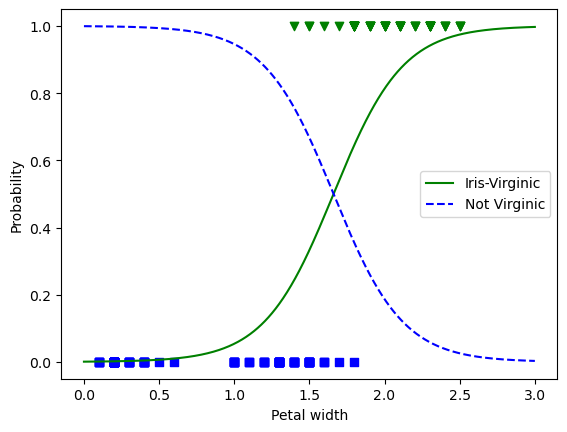

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
print(X_new[:5])
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginic')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Virginic')
plt.scatter(X[y == 1], np.full_like(X[y == 1], 1), marker='v', c='g')
plt.scatter(X[y != 1], np.full_like(X[y != 1], 0), marker='s', c='b')
plt.legend()
plt.xlabel('Petal width')
plt.ylabel('Probability')

(2.9, 7.0, 0.8, 2.7)

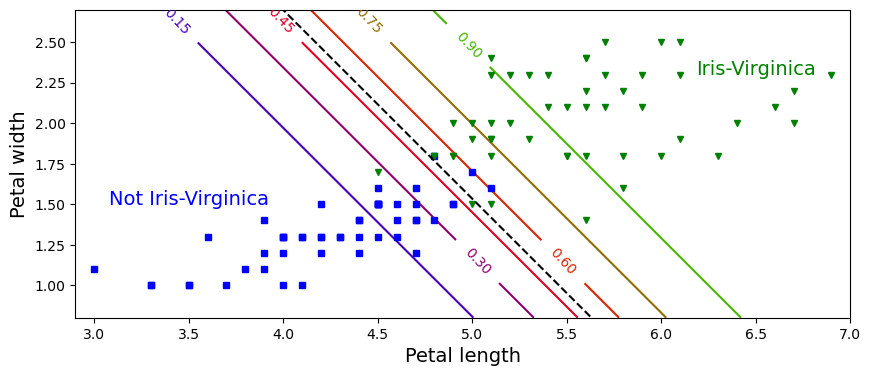

In [26]:
X = iris['data'][:, [2, 3]]
y = (iris['target'] == 2).astype(np.int)
log_reg.fit(X, y)
plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', markersize=4)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'gv', markersize=4)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
z_proba_1 = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, z_proba_1, cmap=plt.cm.brg)
plt.clabel(contour, inline=True)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0, 0] * left_right + log_reg.intercept_) / log_reg.coef_[0, 1]
plt.plot(left_right, boundary, 'k--')

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.axis([2.9, 7, 0.8, 2.7])

## Multinomial Logistic regression
#### s_k(X) = (theta^(k))^T * X
#### p_k = sigma(s(X))__k = exp(s_k(X) / sum_{j=1}^{K}[exp(s_j(X))],
k -  class
#### y = argmax sigma(s(X))_k
<br>
loss: J(theta) = - 1/m * sum_{i=1}^{m}sum_{k=1}^{K}[y^(i)_k * log(p^(i)_k)]

In [37]:
# TODO
print('TODO')

X, y = iris['data'][:, [2, 3]], iris['target']
K, M, N = np.unique(y).shape[0], *X.shape

X_b = np.c_[np.ones((M, 1)), X]
print(X_b[:5])

eta, n_iterations = 0.1, 1000
theta = np.random.randn(K, N + 1)
print(theta)

for iteration in range(n_iterations):
    sk = X_b @ theta.T
    pk = np.exp(sk) / np.sum(np.exp(sk), axis=1).reshape(-1, 1)
    yk = np.zeros_like(pk)
    yk[np.arange(M), np.argmax(pk, axis=1)] = 1
    gradient = 1 / M * ((pk - yk).T @ X_b) # works wrong
    theta = theta - 0.1 * gradient
print('\n', theta)

[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]]
[[-1.82133104 -1.76503748  0.73995237]
 [-3.16977154 -0.64561143  2.43297617]
 [-0.06923395 -0.39919396  2.26113884]]

 [[-1.98506305 -1.99476308  0.7033832 ]
 [-3.42504338 -1.13631469  2.32024043]
 [ 0.3497699   0.32123489  2.41044375]]


## Scikit Multi Logistic reg

In [28]:
X, y = iris['data'][:, 2], iris['target']
X, y = iris['data'][:, [2, 3]], iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))
print('\n', softmax_reg.intercept_, '\n', softmax_reg.coef_)

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]

 [ 18.87514796   6.3844344  -25.25958236] 
 [[-4.58614563 -2.24129385]
 [ 0.16068263 -2.15860167]
 [ 4.425463    4.39989552]]


(0.0, 7.0, 0.0, 3.5)

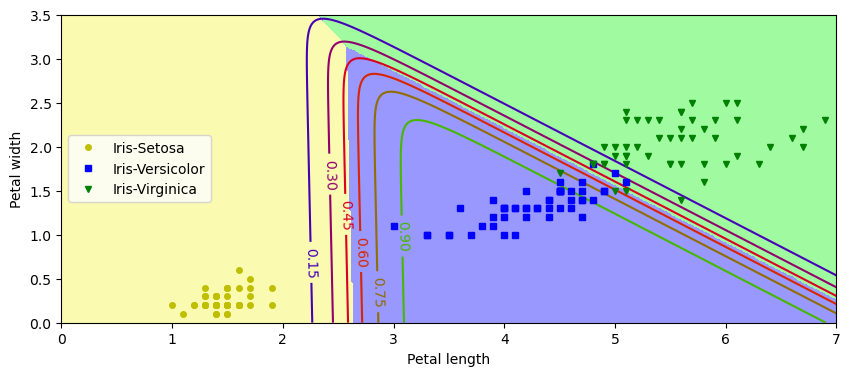

In [29]:
plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', markersize=4, label='Iris-Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', markersize=4, label='Iris-Versicolor')
plt.plot(X[y == 2, 0], X[y == 2, 1], 'gv', markersize=4, label='Iris-Virginica')

x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
z_proba_1 = y_proba[:, 1].reshape(x0.shape)
z_predict = y_predict.reshape(x0.shape)
contour = plt.contour(x0, x1, z_proba_1, cmap=plt.cm.brg)
plt.clabel(contour, inline=True)

custom_cmap = mpl.colors.ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, z_predict, cmap=custom_cmap)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc='center left')
plt.axis([0, 7, 0, 3.5])